In [1]:
import pandas as pd # For DataFrames, Series, and reading csv data in.
import seaborn as sns # Graphing, built ontop of MatPlot for ease-of-use and nicer diagrams.
import matplotlib.pyplot as plt # MatPlotLib for graphing data visually. Seaborn more likely to be used.
import numpy as np # For manipulating arrays and changing data into correct formats for certain libraries
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler  # For Normalization
import scikitplot # Confusion matrix plotting

In [2]:
df1=pd.read_csv('data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df1=df1.sample(n=100000,random_state=24)
df2 = pd.read_csv('data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#df2=df2.sample(n=100000,random_state=24)
df3 = pd.read_csv('data/Friday-WorkingHours-Morning.pcap_ISCX.csv')
#df3=df3.sample(n=100000,random_state=24)
df4 = pd.read_csv('data/Monday-WorkingHours.pcap_ISCX.csv')
#df4=df4.sample(n=100000,random_state=24)
df5 = pd.read_csv('data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
#df5=df5.sample(n=100000,random_state=24)
df6 = pd.read_csv('data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
#df6=df6.sample(n=100000,random_state=24)
df7 = pd.read_csv('data/Tuesday-WorkingHours.pcap_ISCX.csv')
#df7=df7.sample(n=100000,random_state=24)
df8 = pd.read_csv('data/Wednesday-workingHours.pcap_ISCX.csv')
#df8=df8.sample(n=100000,random_state=24)


In [3]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],axis=0)
del df1,df2,df3,df4,df5,df6,df7,df8

In [4]:
df.shape

(2830743, 79)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#handling nan and inf values
def clean_dataset(df_cleaned):
    assert isinstance(df_cleaned, pd.DataFrame), "df needs to be a pd.DataFrame"
    df_cleaned.dropna(inplace=True) #eliminating rows or columns containing NaN values.
    indices_to_keep = ~df_cleaned.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df_cleaned[indices_to_keep].astype(np.float64)


df_cleaned = df.copy()
#.reset_index() method resets the Pandas Dataframe indexes, for the rows. Useful to do after merging rows, as this messes up the indexes.
df_cleaned = df_cleaned.reset_index()
df_cleaned.drop('index', axis=1, inplace=True)
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
'''
df_cleaned['label'] = df_cleaned['label'].replace({'BENIGN': 0, 'DDoS': 1 ,'PortScan':2, 'Bot':3,'Infiltration':4,'Web Attack � Brute Force':5,'Web Attack � XSS':6,
                       ValueError: Found input variables with inconsistent numbers of samples: [2262300, 565576]                            'Web Attack � Sql Injection':7,'FTP-Patator':8,'SSH-Patator':9,'DoS slowloris':10,'DoS Slowhttptest':11,'DoS Hulk':12,'DoS GoldenEye':13,'Heartbleed':14})
'''
df_cleaned['label']=Le.fit_transform(df_cleaned['label'])
Le.classes_
#for inverse transform
#Le.inverse_transform([number])


array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack � Brute Force', 'Web Attack � Sql Injection',
       'Web Attack � XSS'], dtype=object)

In [9]:
df_cleaned.shape

(2830743, 79)

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             int64  
 1   flow_duration                int64  
 2   total_fwd_packets            int64  
 3   total_backward_packets       int64  
 4   total_length_of_fwd_packets  int64  
 5   total_length_of_bwd_packets  int64  
 6   fwd_packet_length_max        int64  
 7   fwd_packet_length_min        int64  
 8   fwd_packet_length_mean       float64
 9   fwd_packet_length_std        float64
 10  bwd_packet_length_max        int64  
 11  bwd_packet_length_min        int64  
 12  bwd_packet_length_mean       float64
 13  bwd_packet_length_std        float64
 14  flow_bytes/s                 float64
 15  flow_packets/s               float64
 16  flow_iat_mean                float64
 17  flow_iat_std                 float64
 18  flow_iat_max                 int64  
 19  

In [11]:
df_cleaned.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [7]:
df_cleaned = clean_dataset(df_cleaned)

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2827876 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             float64
 1   flow_duration                float64
 2   total_fwd_packets            float64
 3   total_backward_packets       float64
 4   total_length_of_fwd_packets  float64
 5   total_length_of_bwd_packets  float64
 6   fwd_packet_length_max        float64
 7   fwd_packet_length_min        float64
 8   fwd_packet_length_mean       float64
 9   fwd_packet_length_std        float64
 10  bwd_packet_length_max        float64
 11  bwd_packet_length_min        float64
 12  bwd_packet_length_mean       float64
 13  bwd_packet_length_std        float64
 14  flow_bytes/s                 float64
 15  flow_packets/s               float64
 16  flow_iat_mean                float64
 17  flow_iat_std                 float64
 18  flow_iat_max                 float64
 19  flow_

In [8]:
def Pre_process_data(df,col):
    '''
    input data-frame and coumn name
    operation fills the nan values with the minimum value in thier respective colum
    output returns the pre-processed dataframe
    '''
    print("Name of column with NaN:"+str(col))
    print(df[col].value_counts(dropna=False,normalize=True).head())
    df[col].replace(np.inf,-1,inplace=True)
    return df

In [9]:
def reduce_mem_usage(df):
    '''
    
   
    '''
    #print("Memory usage of properties dataframe is:", df.memory_usage().sum()/1024**2, "MB")
    for col in df.columns:
        if df[col].dtype != object: #exclude strings
            print("***************************************")
            print("Column:", col)
            print("dtype before:", df[col].dtype)
            # make variables for int, max and min
            IsInt = False
            mx = df[col].max
            mn = df[col].min
            # NA values should be handled prior to this
            if not np.isfinite(df[col].all()):
                df=Pre_process_data(df,col)
                
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt=True
            
            if IsInt:
                if mn() >= 0:
                    if mx() < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx() < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx() < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn() > np.iinfo(np.int8).min and mx() < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn() > np.iinfo(np.int16).min and mx() < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn() > np.iinfo(np.int32).min and mx() < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn() > np.iinfo(np.int64).min and mx() < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
            # make float datatypes 32bit
            else:
                df[col] = df[col].astype(np.float32)

          # print new column type
        print("dtype after:", df[col].dtype)
        print("*********************")
                
    #print("mem usage after completion")
    #mem_usg = df.memory_usage().sum / 1024 ** 2
   # print("final memory usage",mem_usg, "MB")
    return df

In [10]:
df_cleaned=reduce_mem_usage(df_cleaned) 

***************************************
Column: destination_port
dtype before: float64
dtype after: uint32
*********************
***************************************
Column: flow_duration
dtype before: float64
dtype after: int32
*********************
***************************************
Column: total_fwd_packets
dtype before: float64
dtype after: uint32
*********************
***************************************
Column: total_backward_packets
dtype before: float64
dtype after: uint32
*********************
***************************************
Column: total_length_of_fwd_packets
dtype before: float64
dtype after: uint32
*********************
***************************************
Column: total_length_of_bwd_packets
dtype before: float64
dtype after: uint32
*********************
***************************************
Column: fwd_packet_length_max
dtype before: float64
dtype after: uint16
*********************
***************************************
Column: fwd_packet_length_m

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2827876 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             uint32 
 1   flow_duration                int32  
 2   total_fwd_packets            uint32 
 3   total_backward_packets       uint32 
 4   total_length_of_fwd_packets  uint32 
 5   total_length_of_bwd_packets  uint32 
 6   fwd_packet_length_max        uint16 
 7   fwd_packet_length_min        uint16 
 8   fwd_packet_length_mean       float32
 9   fwd_packet_length_std        float32
 10  bwd_packet_length_max        uint16 
 11  bwd_packet_length_min        uint16 
 12  bwd_packet_length_mean       float32
 13  bwd_packet_length_std        float32
 14  flow_bytes/s                 float32
 15  flow_packets/s               float32
 16  flow_iat_mean                float32
 17  flow_iat_std                 float32
 18  flow_iat_max                 int32  
 19  flow_

In [11]:
df_cleaned['label'].value_counts()

label
0     2271320
4      230124
10     158804
2      128025
3       10293
7        7935
11       5897
6        5796
5        5499
1        1956
12       1507
14        652
9          36
13         21
8          11
Name: count, dtype: int64

In [19]:
#df_cleaned.to_csv('df processed_data_full3M.csv', index=False)

In [17]:
#performing correlation test to do feature selection
#df_cleaned=pd.read_csv('df processed_data_full3M.csv')


In [12]:
X=df_cleaned.drop('label',axis=1)
y=df_cleaned['label']

In [13]:
print(X.shape)
print(y.shape)

(2827876, 78)
(2827876,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2262300, 78)
(2262300,)
(565576, 78)
(565576,)


In [31]:
'''
#while saving them, make sure to include index=False for correct output, else inherits an unwanted (unnecessary) index column as 0th column
X_train.to_csv('X_train_data.csv', index=False) 
X_test.to_csv('X_test_data.csv', index=False)
y_train.to_csv('y_train_data.csv', index=False)
y_test.to_csv('y_test_data.csv', index=False)
'''

'''
#reading them
X_train_bc=pd.read_csv('eda2_results/before_correlation/X_train_data.csv')
X_test_bc=pd.read_csv('eda2_results/before_correlation/X_test_data.csv')
y_train_bc=pd.read_csv('eda2_results/before_correlation/y_train_data.csv')
y_test_bc=pd.read_csv('eda2_results/before_correlation/y_test_data.csv')
'''

"\n#reading them\nX_train_bc=pd.read_csv('eda2_results/before_correlation/X_train_data.csv')\nX_test_bc=pd.read_csv('eda2_results/before_correlation/X_test_data.csv')\ny_train_bc=pd.read_csv('eda2_results/before_correlation/y_train_data.csv')\ny_test_bc=pd.read_csv('eda2_results/before_correlation/y_test_data.csv')\n"

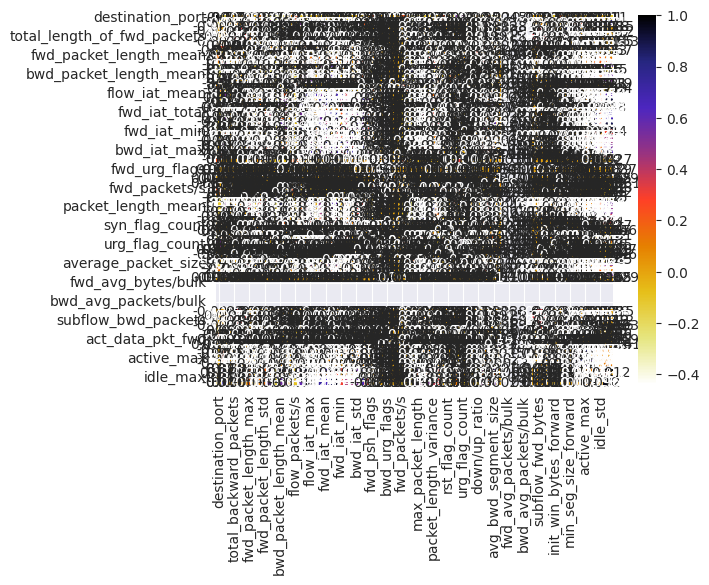

In [5]:
'''
plt.figure(15,15)
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()'''

In [23]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
'''
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr'''

In [24]:
#corr_features = correlation(X_train, 0.9)
#len(set(corr_features))

31

In [25]:
#items_to_remove={'avg_bwd_segment_size','ece_flag_count','cwe_flag_count','idle_min','subflow_fwd_packets','total_backward_packets','average_packet_size','fwd_iat_max','subflow_fwd_bytes','fwd_packets/s', 'syn_flag_count','flow_iat_max', 'total_length_of_bwd_packets','max_packet_length','idle_max'}


#corr_features.difference_update(items_to_remove)

#len(corr_features)


16

In [26]:
X.columns

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

In [28]:
#items_to_add={'fwd_iat_std','flow_iat_min','packet_length_variance','idle_min','fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length','fin_flag_count',
       'syn_flag_count', 'rst_flag_count', 'psh_flag_count', 'ack_flag_count',
       'urg_flag_count', 'cwe_flag_count', 'ece_flag_count', 'down/up_ratio',
       'average_packet_size', 'avg_fwd_segment_size', 'avg_bwd_segment_size',
       'fwd_header_length.1', 'fwd_avg_bytes/bulk', 'fwd_avg_packets/bulk',
       'fwd_avg_bulk_rate', 'bwd_avg_bytes/bulk', 'bwd_avg_packets/bulk',
       'bwd_avg_bulk_rate', 'subflow_fwd_packets', 'subflow_fwd_bytes',
       'subflow_bwd_packets', 'subflow_bwd_bytes', 'init_win_bytes_forward','init_win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'active_mean', 'active_std', 'active_max', 'active_min', 'idle_mean',
       'idle_std', 'idle_max', 'idle_min'}



#corr_features.update(items_to_add)
#len(set(corr_features))

18

In [16]:
corr_features={'fwd_iat_std','flow_iat_min','packet_length_variance','idle_min','fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length','fin_flag_count',
       'syn_flag_count', 'rst_flag_count', 'psh_flag_count', 'ack_flag_count',
       'urg_flag_count', 'cwe_flag_count', 'ece_flag_count', 'down/up_ratio',
       'average_packet_size', 'avg_fwd_segment_size', 'avg_bwd_segment_size',
       'fwd_header_length.1', 'fwd_avg_bytes/bulk', 'fwd_avg_packets/bulk',
       'fwd_avg_bulk_rate', 'bwd_avg_bytes/bulk', 'bwd_avg_packets/bulk',
       'bwd_avg_bulk_rate', 'subflow_fwd_packets', 'subflow_fwd_bytes',
       'subflow_bwd_packets', 'subflow_bwd_bytes', 'init_win_bytes_forward','init_win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'active_mean', 'active_std', 'active_max', 'active_min', 'idle_mean',
       'idle_std', 'idle_max', 'idle_min','destination_port','bwd_header_length'}

In [17]:
X_train.drop(corr_features,axis=1,inplace=True) #exporting does not preserve datatype hence increases size of file

In [18]:
X_test.drop(corr_features,axis=1,inplace=True)


In [51]:
X_train.columns

Index(['flow_duration', 'total_fwd_packets', 'total_backward_packets',
       'total_length_of_fwd_packets', 'total_length_of_bwd_packets',
       'fwd_packet_length_max', 'fwd_packet_length_min',
       'fwd_packet_length_mean', 'fwd_packet_length_std',
       'bwd_packet_length_max', 'bwd_packet_length_min',
       'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes/s',
       'flow_packets/s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_max', 'fwd_iat_min',
       'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max',
       'bwd_iat_min', 'fwd_packets/s', 'bwd_packets/s', 'min_packet_length',
       'max_packet_length', 'packet_length_mean', 'packet_length_std'],
      dtype='object')

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2262300, 35)
(2262300,)
(565576, 35)
(565576,)


In [19]:
sc=StandardScaler()
X_train.iloc[:,:]=sc.fit_transform(X_train.iloc[:,:]) #Must have equal len keys and value when setting with a ndarray


In [20]:
X_test.iloc[:,:]=sc.transform(X_test.iloc[:,:])

In [37]:
#X_train.drop('index',axis=1,inplace=True)
y_train.shape

(2262300,)

In [21]:
X_train=reduce_mem_usage(X_train)

***************************************
Column: flow_duration
dtype before: float64
dtype after: float32
*********************
***************************************
Column: total_fwd_packets
dtype before: float64
dtype after: float32
*********************
***************************************
Column: total_backward_packets
dtype before: float64
dtype after: float32
*********************
***************************************
Column: total_length_of_fwd_packets
dtype before: float64
dtype after: float32
*********************
***************************************
Column: total_length_of_bwd_packets
dtype before: float64
dtype after: float32
*********************
***************************************
Column: fwd_packet_length_max
dtype before: float64
dtype after: float32
*********************
***************************************
Column: fwd_packet_length_min
dtype before: float64
dtype after: float32
*********************
***************************************
Column: fwd_pa

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2262300 entries, 671365 to 242122
Data columns (total 31 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   flow_duration                int32  
 1   total_fwd_packets            float32
 2   total_backward_packets       float32
 3   total_length_of_fwd_packets  float32
 4   total_length_of_bwd_packets  float32
 5   fwd_packet_length_max        float32
 6   fwd_packet_length_min        float32
 7   fwd_packet_length_mean       float32
 8   fwd_packet_length_std        float32
 9   bwd_packet_length_max        float32
 10  bwd_packet_length_min        float32
 11  bwd_packet_length_mean       float32
 12  bwd_packet_length_std        float32
 13  flow_bytes/s                 float32
 14  flow_packets/s               float32
 15  flow_iat_mean                float32
 16  flow_iat_std                 float32
 17  flow_iat_max                 float32
 18  fwd_iat_mean                 float32
 19  f

In [22]:
X_test=reduce_mem_usage(X_test)

***************************************
Column: flow_duration
dtype before: float64
dtype after: float32
*********************
***************************************
Column: total_fwd_packets
dtype before: float64
dtype after: float32
*********************
***************************************
Column: total_backward_packets
dtype before: float64
dtype after: float32
*********************
***************************************
Column: total_length_of_fwd_packets
dtype before: float64
dtype after: float32
*********************
***************************************
Column: total_length_of_bwd_packets
dtype before: float64
dtype after: float32
*********************
***************************************
Column: fwd_packet_length_max
dtype before: float64
dtype after: float32
*********************
***************************************
Column: fwd_packet_length_min
dtype before: float64
dtype after: float32
*********************
***************************************
Column: fwd_pa

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2262300, 35)
(2262300,)
(565576, 35)
(565576,)


In [23]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [24]:
ytrain_p=xgb_model.predict(X_train)
ytest_p=xgb_model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Calculate accuracy
test_accuracy = accuracy_score(y_test, ytest_p)
train_accuracy = accuracy_score(y_train, ytrain_p)

print("Training Accuracy:", train_accuracy*100)
print("Test Accuracy:", test_accuracy*100)
print(classification_report(y_test, ytest_p))

Training Accuracy: 98.4888829951819
Test Accuracy: 98.47270746990678
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    454258
           1       0.98      0.43      0.60       408
           2       1.00      1.00      1.00     25734
           3       0.95      0.98      0.96      2045
           4       0.88      0.97      0.93     46004
           5       0.93      0.99      0.96      1119
           6       1.00      0.99      1.00      1126
           7       0.99      0.98      0.99      1588
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         6
          10       0.99      1.00      1.00     31664
          11       1.00      0.49      0.66      1187
          12       0.73      0.80      0.76       306
          13       1.00      0.33      0.50         3
          14       0.55      0.26      0.35       125

    accuracy                           0.98    565576
   macro av

In [93]:

'''
#saving model Using sklearn Joblib
import joblib #joblib is preferred method

joblib.dump(xgb_model, 'xgb_model_joblib')

#to load from joblib
xgb_model_joblib=joblib.load('xgb_model_joblib')
'''

"\n#to load from joblib\nxgb_model_joblib=joblib.load('xgb_model_joblib')\n"

In [59]:
'''
import pickle
with open('model_pickle_xgboost','wb') as f:
    pickle.dump(xgb_model,f)
with open('model_pickle_xgboost','rb') as f:
    xgb_model_pickle=pickle.load(f)
'''

In [69]:
'''
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_pred_knn=knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn) * 100
print(accuracy)
import joblib
joblib.dump(knn, 'knn_model_joblib')

'''


KNeighborsClassifier(n_neighbors=3)

In [26]:
ytest_p

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
ytest_p

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
#Le.inverse_transform(ytest_p)

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)